In [1]:
## installing useful packages/libraries:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

In [22]:
## global matplotlib settings:
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update(plt.rcParamsDefault)  # Reset the default matplotlib settings

plt.rcParams['figure.figsize'] = (5, 4)  # Set the figure size (width, height) in inches

plt.rcParams['font.size'] = 12  # Set the font size for labels and titles
plt.rcParams['figure.dpi'] = 150  # Set the DPI (dots per inch) for high-resolution output
plt.rcParams['font.family'] = 'serif'  # Set the font family

plt.rcParams['axes.linewidth'] = 1.5  # Set the linewidth of the axes
plt.rcParams['axes.edgecolor'] = 'black'  # Set the color of the axes' edges
plt.rcParams['axes.spines.top'] = True  # Hide the top spine of the axes
plt.rcParams['axes.spines.right'] = True  # Hide the right spine of the axes

plt.rcParams['xtick.direction'] = 'in'  # Set the direction of x-axis ticks to inward
plt.rcParams['xtick.major.size'] = 4  # Set the size of major x-axis ticks
plt.rcParams['xtick.major.width'] = 1.2  # Set the width of major x-axis ticks
plt.rcParams['xtick.minor.size'] = 2  # Set the size of minor x-axis ticks
plt.rcParams['xtick.minor.width'] = 1.0  # Set the width of minor x-axis ticks

plt.rcParams['ytick.direction'] = 'in'  # Set the direction of y-axis ticks to inward
plt.rcParams['ytick.right'] = True  # Show the y-ticks on the right axis
plt.rcParams['ytick.major.size'] = 4  # Set the size of major y-axis ticks
plt.rcParams['ytick.major.width'] = 1.2  # Set the width of major y-axis ticks
plt.rcParams['ytick.minor.size'] = 2  # Set the size of minor y-axis ticks
plt.rcParams['ytick.minor.width'] = 1.0  # Set the width of minor y-axis ticks

plt.rcParams['lines.linewidth'] = 1.5  # Set the linewidth of the plotted lines
plt.rcParams['legend.frameon'] = False  # Hide the frame of the legend
plt.rcParams['legend.fontsize'] = 10  # Set the font size of the legend

## Loading in the images and playing around with them:

**Parameter Names and Meanings:**

* omegaM = matter density parameter, representing the fraction of the Universe's total energy density contributed by all matter. This is measured as a ratio of the Universe's mean matter density to the critical density (the density required to make the Universe spatially flat). Most measurements place the value at about 0.27. If omegaM > 1, the Universe has a closed geometry (will eventually collapse). If omegaM < 1, the Universe has an open geometry (will keep expanding forever). If omegaM = 1, the Universe has a perfectly flat geometry (expansion will slow but still never stop completely).

* sigma8 = cosmological constant that quantifies the amplitude of matter density fluctuations on a scale of 8 megaparsecs / ($h^{-1}$Mpc). It is used to measure the "clumpiness" of the universe, representing how much matter has clustered together into structures like galaxies and galaxy clusters. Measurements from the early universe suggest a higher degree of clumpiness (a higher sigma8 value), while measurements of nearby galaxies and clusters indicate a lower level of clumpiness (a lower sigma8 value).

* SNe = parameter that controls the strength of supernova explosions in the TNG simulations. This has a major effect on gas density, dark matter density, etc, so it should be mentioned and included.

* SNv = parameter that controls the strength of supernova wind velocity in the TNG simulations. This also has a major effect on gas density, dark matter density, etc, so it should be mentioned and included

* AGN = parameter that controls the strength of active galactic nucleus (typically supermassive black hole) feedback in the TNG simulations. This also has a major effect on gas density, dark matter density, etc, so it should be mentioned and included.

* 1/m_WDM = 1 over the WDM particle mass, expressed often in keV or simply in this form.

(15000, 256, 256)
(1000, 6)


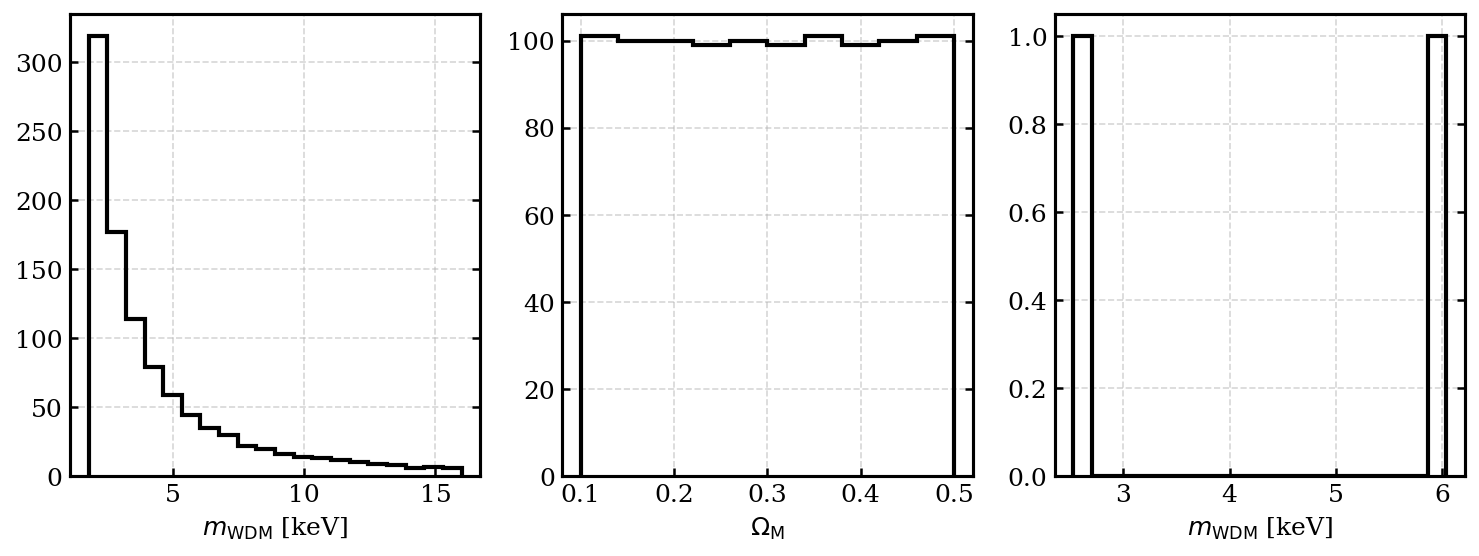

In [47]:
raw_images = np.load('Images_Nbody_WDM_TNG_z=0.00.npy', mmap_mode = "r+")
print(raw_images.shape)

fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (12,4))

## plot 1:
WDM_params = np.loadtxt('WDM_TNG_params_1000.txt')   ## text file with all the parameters used for 1000 of the simulations
print(WDM_params.shape)
WDM_param_names = ['OmegaM','sigma8','SNE','SNv','AGN','1/m_WDM']  # this is the order of the columns in the text file
minimum = np.array([0.1,  0.6,  0.25,   0.5,    0.25, 0.0625])
maximum = np.array([0.5,  1.0,  4.00,   2.00,   4.00, 0.5555])    # not sure why this is hardcoded...
WDM_params = (WDM_params * (maximum - minimum)) + minimum

bins = 20
# plot a histogram of the WDM masses, log scale histogram
ax[0].hist((1./WDM_params[:, 5]), bins=bins, color='k', histtype='step', lw=2, density=False, log=False)   #[:, 5] means whole 5th column in text file
#plt.hist((WDM_params[:, 1]), bins=bins, color='k', histtype='step', lw=2, density=False, log=False
ax[0].grid(True, ls='--', alpha=0.5, which='both')
ax[0].set_xlabel(r'$m_{\rm WDM}$ [keV]')

## plot 2:
# histogram of the OmegaM values
ax[1].hist(WDM_params[:, 0], bins=10, color='k', histtype='step', lw=2, density=False, log=False)  # [:, 0] means whole 1st column in text file
ax[1].grid(True, ls='--', alpha=0.5, which='both')
ax[1].set_xlabel(r'$\Omega_{\rm M}$')

## plot 3: plotting a histogram of WDM masses for a set range of OmegaM and sigma8
epsilon = 0.005
OmegaM_range = [0.49-epsilon,0.49+epsilon]
sigma8_range = [0.8-4*epsilon,0.8+4*epsilon]
WDM_masses = (1./WDM_params[:, 5])[(WDM_params[:, 0] > OmegaM_range[0]) & (WDM_params[:, 0] < OmegaM_range[1]) & (WDM_params[:, 1] > sigma8_range[0]) & (WDM_params[:, 1] < sigma8_range[1])]

ax[2].hist(WDM_masses, bins=bins, color='k', histtype='step', lw=2, density=False, log=False)
ax[2].grid(True, ls='--', alpha=0.5, which='both')
ax[2].set_xlabel(r'$m_{\rm WDM}$ [keV]')
plt.show()

415
Params: [0.485358   0.815636   2.914225   0.995822   3.9307     0.16552468]
WDM mass: 6.041395338791633 keV, OmegaM: 0.48535800000000007, Sigma8: 0.815636


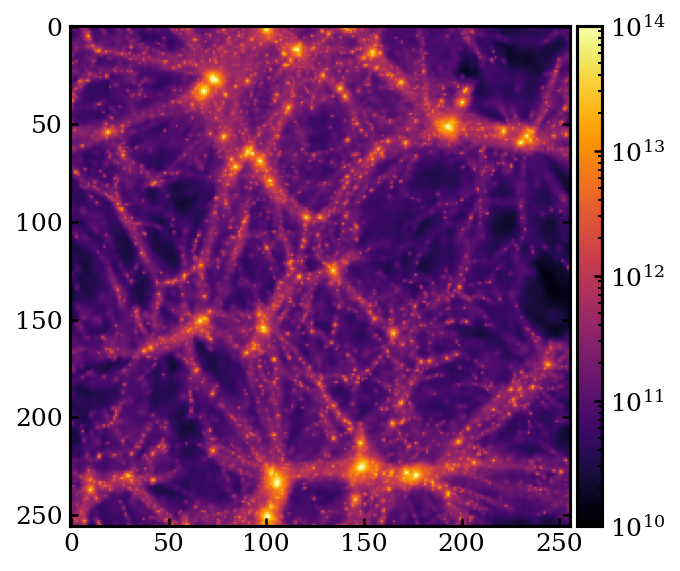

In [48]:
# visualise the first raw image, using log scale
mass_index = 5
epsilon = 0.005
omegam_mean = 0.49
sigma8_mean = 0.8
OmegaM_range = [omegam_mean-epsilon,omegam_mean+epsilon]
sigma8_range = [sigma8_mean-4*epsilon,sigma8_mean+4*epsilon]
valid_indices = ((WDM_params[:, 0] > OmegaM_range[0]) & (WDM_params[:, 0] < OmegaM_range[1]) & (WDM_params[:, 1] > sigma8_range[0]) & (WDM_params[:, 1] < sigma8_range[1]))

# finding the nth largest value in an array
index = np.argsort(WDM_params[:,mass_index])[-1]
error = 5e-1
target = 6 # keV
index = np.where((WDM_params[:,mass_index] >= 1./(target + error)) & (WDM_params[:,mass_index] <= 1./(target - error)) & valid_indices)[0][0]
print(index)
vmin = 1e10; vmax = 1e14
print(f'Params: {WDM_params[index]}')

## PLOT ONLY ONE PLOT:
fig, axs = plt.subplots(figsize=(4,4), constrained_layout = True)
print(f'WDM mass: {1./WDM_params[index][mass_index]} keV, OmegaM: {WDM_params[index][np.where(np.array(WDM_param_names) == "OmegaM")[0][0]]}, Sigma8: {WDM_params[index][np.where(np.array(WDM_param_names) == "sigma8")[0][0]]}')
im = axs.imshow(raw_images[15*index + 3], norm=LogNorm(vmin=1e10, vmax=1e14), cmap='inferno')
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax = cax)
plt.show()